In [12]:
#if you haven't installed tiingo
pip install tiingo

Note: you may need to restart the kernel to use updated packages.


In [13]:
#if you haven't installed tiingo pandas data frame
pip install tiingo[pandas]

Note: you may need to restart the kernel to use updated packages.


In [14]:
# Import Libraries and Dependencies 
import pandas as pd
import numpy as np 
import os
import json
from pathlib import Path
from datetime import datetime, timedelta
from tiingo import TiingoClient
%matplotlib inline

In [15]:
# Bring Env Variables into Python/Store in Variable
tiingo = os.getenv('TIINGO_API_KEY')

In [16]:
# Create a Client to Connect to Tiingo
client = TiingoClient()

# Data Collection for US Stocks

In [65]:
# Create Start and End Dates for 1 Year's Worth of Historical Data
end = datetime.now()
start = end + timedelta(-30)
#start = datetime.strptime('2020-01-23', '%Y-%m-%d')

In [66]:
# Create DataFrames for China
us_ticker_df = client.get_dataframe(['SPY','IGM', 'IYE', 'IYM', 'IYH', 'IECS'],
                                            metric_name='close',
                                            startDate= start,
                                            endDate= end,
                                            frequency='daily')

In [67]:
us_df = us_ticker_df.rename(columns={'IGM':'IGM (Technology)', 'IYE':'IYE (Energy)', 'IYM':'IYM (Materials)', 'IYH':'IYH (Healthcare)', 'IECS':'IECS (Consumer Staples)'})
us_df.head()

,SPY,IGM (Technology),IYE (Energy),IYM (Materials),IYH (Healthcare),IECS (Consumer Staples)
2020-01-07 00:00:00+00:00,322.73,246.44,32.49,94.84,215.17,28.2500
2020-01-08 00:00:00+00:00,324.45,248.53,31.91,94.95,216.59,28.3948
2020-01-09 00:00:00+00:00,326.65,250.76,32.10,95.07,217.63,28.5640
2020-01-10 00:00:00+00:00,325.71,250.35,31.90,94.51,217.80,28.5860
2020-01-13 00:00:00+00:00,327.95,253.39,31.92,95.85,216.87,28.8030


In [68]:
# Count/Drop Nulls (if any)
us_df.isnull().sum()

SPY                        0
IGM (Technology)           0
IYE (Energy)               0
IYM (Materials)            0
IYH (Healthcare)           0
IECS (Consumer Staples)    1
dtype: int64

In [69]:
us_df.dropna(inplace=True)
us_df.isnull().sum()

SPY                        0
IGM (Technology)           0
IYE (Energy)               0
IYM (Materials)            0
IYH (Healthcare)           0
IECS (Consumer Staples)    0
dtype: int64

# Monte Carlo Simulation 

In [70]:
# Calculate the Daily Returns for China Stocks
us_daily_returns = us_df.pct_change()
us_daily_returns.head()

,SPY,IGM (Technology),IYE (Energy),IYM (Materials),IYH (Healthcare),IECS (Consumer Staples)
2020-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08 00:00:00+00:00,0.005330,0.008481,-0.017852,0.001160,0.006599,0.005126
2020-01-09 00:00:00+00:00,0.006781,0.008973,0.005954,0.001264,0.004802,0.005959
2020-01-10 00:00:00+00:00,-0.002878,-0.001635,-0.006231,-0.005890,0.000781,0.000770
2020-01-13 00:00:00+00:00,0.006877,0.012143,0.000627,0.014178,-0.004270,0.007591


In [71]:
# Calculate the Value of Average Daily Returns
avg_daily_returns_spy = us_daily_returns.mean()['SPY']
avg_daily_returns_igm = us_daily_returns.mean()['IGM (Technology)']
avg_daily_returns_iye = us_daily_returns.mean()['IYE (Energy)']
avg_daily_returns_iym = us_daily_returns.mean()['IYM (Materials)']
avg_daily_returns_iyh = us_daily_returns.mean()['IYH (Healthcare)']
avg_daily_returns_iecs = us_daily_returns.mean()['IECS (Consumer Staples)']

In [72]:
# Calculate the Standard Deviation 
std_daily_returns_spy = us_daily_returns.std()['SPY']
std_daily_returns_igm = us_daily_returns.std()['IGM (Technology)']
std_daily_returns_iye = us_daily_returns.std()['IYE (Energy)']
std_daily_returns_iym = us_daily_returns.std()['IYM (Materials)']
std_daily_returns_iyh = us_daily_returns.std()['IYH (Healthcare)']
std_daily_returns_iecs = us_daily_returns.std()['IECS (Consumer Staples)']

In [73]:
# Save the Last Day's Closing Price
spy_last_price = us_df['SPY'][-1]
igm_last_price = us_df['IGM (Technology)'][-1]
iye_last_price = us_df['IYE (Energy)'][-1]
iym_last_price = us_df['IYM (Materials)'][-1]
iyh_last_price = us_df['IYH (Healthcare)'][-1]
iecs_last_price = us_df['IECS (Consumer Staples)'][-1]

In [74]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [75]:
# Run the Monte Carlo Simulation
for x in range (number_simulations):
    #simulated_spy_prices = [spy_last_price]
    simulated_igm_prices = [igm_last_price]
    simulated_iye_prices = [iye_last_price]
    simulated_iym_prices = [iym_last_price]
    simulated_iyh_prices = [iyh_last_price]
    simulated_iecs_prices = [iecs_last_price]
    
    for y in range (number_records):
        #simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_returns_spy, std_daily_returns_spy))
        simulated_igm_price = simulated_igm_prices[-1] * (1 + np.random.normal(avg_daily_returns_igm, std_daily_returns_igm))
        simulated_iye_price = simulated_iye_prices[-1] * (1 + np.random.normal(avg_daily_returns_iye, std_daily_returns_iye))
        simulated_iym_price = simulated_iym_prices[-1] * (1 + np.random.normal(avg_daily_returns_iym, std_daily_returns_iym))
        simulated_iyh_price = simulated_iyh_prices[-1] * (1 + np.random.normal(avg_daily_returns_iyh, std_daily_returns_iyh))
        simulated_iecs_price = simulated_iecs_prices[-1] * (1 + np.random.normal(avg_daily_returns_iecs, std_daily_returns_iecs))
       
        #simulated_spy_prices.append(simulated_spy_price)
        simulated_igm_prices.append(simulated_igm_price)
        simulated_iye_prices.append(simulated_iye_price)
        simulated_iym_prices.append(simulated_iym_price)
        simulated_iyh_prices.append(simulated_iyh_price)
        simulated_iecs_prices.append(simulated_iecs_price)
    
   #monte_carlo['SPY prices'] = pd.Series(simulated_spy_prices)
    monte_carlo['IGM (Technology) prices'] = pd.Series(simulated_igm_prices)
    monte_carlo['IYE (Energy) prices'] = pd.Series(simulated_iye_prices)
    monte_carlo['IYM (Materials) prices'] = pd.Series(simulated_iym_prices)
    monte_carlo['IYH (Healthcare) prices'] = pd.Series(simulated_iyh_prices)
    monte_carlo['IECS (Consumer Staples) prices'] = pd.Series(simulated_iecs_prices)
    
    simulated_us_daily_returns = monte_carlo.pct_change()
    
    weights = [(0.2), (0.2), (0.2), (0.2), (0.2)]
    us_portfolio_daily_returns = simulated_us_daily_returns.dot(weights)
    
    portfolio_cumulative_returns[x] = ((1 + us_portfolio_daily_returns.fillna(0)).cumprod()-1)

In [77]:
portfolio_cumulative_returns

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000386,-0.000095,-0.003451,-0.009213,0.004502,-0.002587,0.005587,0.002819,0.000391,-0.001360,...,-0.013248,-0.002233,0.007616,-0.001301,-0.005580,-0.003358,0.004694,-0.004010,-0.005599,-0.005849
2,0.001728,0.002214,-0.009363,-0.009151,0.007764,-0.009328,0.010626,0.001032,-0.008534,-0.011748,...,-0.011435,0.000761,-0.001532,-0.005400,-0.004400,-0.003790,0.012538,-0.010463,-0.008060,-0.006123
3,-0.006873,-0.001621,-0.000985,-0.011664,0.009443,-0.009405,0.005665,0.000092,-0.001014,-0.007913,...,-0.018550,0.013583,-0.003625,-0.005038,-0.006705,-0.009123,0.015070,-0.003109,-0.010395,-0.009799
4,-0.011558,0.008569,-0.002291,-0.019663,0.019706,-0.012780,0.007588,0.001880,0.001564,-0.004317,...,-0.016048,0.015495,-0.001145,-0.016934,-0.003697,-0.015157,0.017871,-0.004818,-0.011115,-0.014663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,-0.041383,0.059622,0.065120,0.068884,-0.036097,0.017771,0.126269,0.097014,0.048724,0.116426,...,0.112335,0.050304,-0.074329,-0.066216,0.065704,-0.032872,0.025843,-0.008441,0.034117,-0.014979
249,-0.041241,0.051704,0.067982,0.066950,-0.034724,0.022912,0.135994,0.092748,0.047686,0.113469,...,0.115381,0.055524,-0.068403,-0.071574,0.064071,-0.023273,0.024594,-0.009928,0.040160,-0.013655
250,-0.040131,0.054111,0.071082,0.079165,-0.035945,0.033436,0.139669,0.093545,0.054503,0.115949,...,0.122367,0.061819,-0.068307,-0.065678,0.060430,-0.025333,0.029579,-0.014595,0.032992,-0.015503
251,-0.041186,0.050405,0.072160,0.071915,-0.027355,0.040202,0.145639,0.093410,0.053627,0.117283,...,0.121264,0.065067,-0.077970,-0.071976,0.055648,-0.029084,0.028162,-0.022350,0.037073,-0.011607


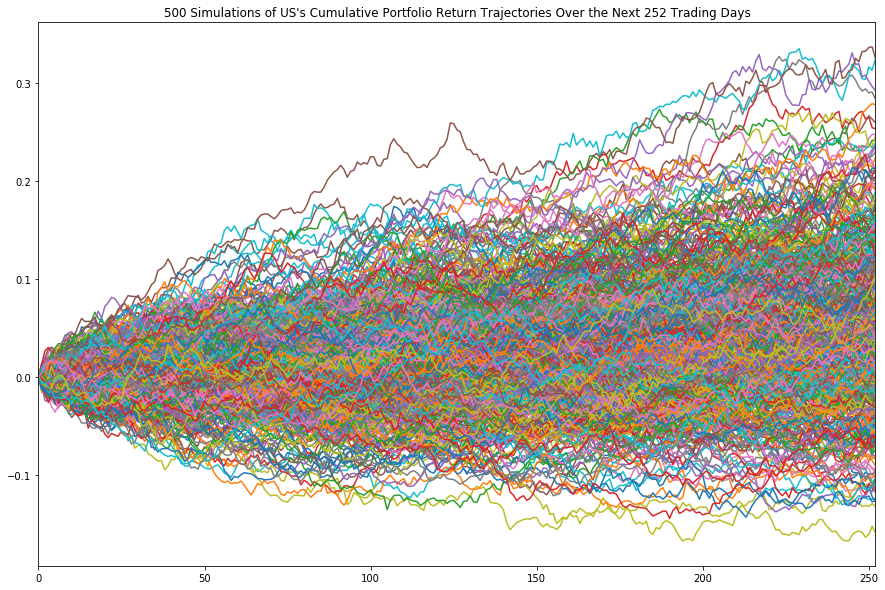

In [78]:
# Visualize the Simulation
plot_title = f"{number_simulations} Simulations of US's Cumulative Portfolio Return Trajectories Over the Next {number_records} Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title, figsize=(15,10))